In [36]:
# %load src/plot_settings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('seaborn-pastel')
%matplotlib inline

twi = '#DCB8E7' #Pale, light grayish mulberry
twi_blu = '#273873' #Dark sapphire blue
twi_pur = '#662D8A' #Moderate purple
twi_pnk = '#ED438D' #Brilliant raspberry


## Loading data

In [44]:
usage_df = pd.read_csv('data/usage_timeseries.csv', index_col=1)
# Read file obtained from my pipeline

usage_df = usage_df.drop(usage_df.columns[0], axis=1)
# Drop the extra index collumn csv conversion created

usage_df.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119


In [76]:
df = usage_df.transpose()
df.head()

Weapon Name,Splattershot,Range Blaster,Splat Roller,N-ZAP '85,Splat Brella,Sloshing Machine,Splat Charger,Splattershot Pro,Tentatek Splattershot,Sploosh-o-matic,...,Tri-Slosher Nouveau,Neo Splash-o-matic,Custom Range Blaster,Glooga Dualies Deco,Foil Squeezer,New Squiffer,Carbon Roller Deco,Custom Dualie Squelchers,Rapid Blaster Pro Deco,Undercover Sorella Brella
Week 1,0.1710,0.0683,0.0671,0.0615,0.0494,0.0446,0.0345,0.0308,0.0254,0.0252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 2,0.1598,0.0639,0.0693,0.0665,0.0583,0.0424,0.0310,0.0327,0.0272,0.0256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 3,0.1548,0.0617,0.0755,0.0714,0.0591,0.0440,0.0319,0.0328,0.0261,0.0286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 4,0.1462,0.0634,0.0712,0.0693,0.0615,0.0476,0.0341,0.0305,0.0359,0.0257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week 5,0.0941,0.0577,0.0742,0.0776,0.0570,0.0400,0.0341,0.0283,0.0654,0.0225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.shape

(31, 88)

In [79]:
df['x'] = np.arange(1, 32)

## Spaghetti plot

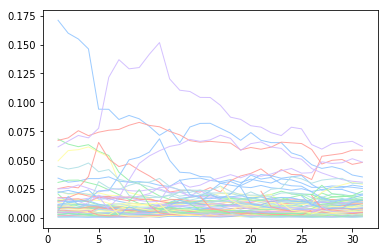

In [81]:
df['x'] = np.arange(1, 32)

# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', linewidth=1, alpha=0.9, label=column)

# Add legend
# plt.legend(loc=2, ncol=2)


In [57]:
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14), 'y10': np.random.randn(10)+range(2,12) })

In [51]:
df

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
0,1,1.030903,1.413335,10.821305,5.926615,2.292640,2.755323,4.691846,2.932490,3.312116,2.623549
1,2,-0.929724,0.242887,12.553137,6.065017,6.606590,5.306791,6.081157,2.501335,3.847655,4.408142
2,3,-0.072186,2.601709,12.403282,5.868803,4.701404,4.639498,6.748374,5.728589,5.083179,3.780648
3,4,0.944926,3.208706,13.545304,8.643862,7.249147,5.406922,6.682963,8.820610,8.467424,5.072818
4,5,-1.700045,2.302511,13.742311,10.412714,9.019053,6.411046,8.670724,9.404334,7.134767,6.174434
5,6,-0.432484,7.084046,16.494428,11.397272,10.580826,7.256393,11.142403,9.132936,8.085654,7.219456
6,7,0.864939,6.945256,16.617315,12.041754,9.143069,7.866635,11.898294,10.984195,10.166787,8.430709
7,8,-1.169160,7.735515,17.140727,11.028179,7.625136,8.254689,12.651444,14.040943,10.912429,9.806302
8,9,-0.539423,8.530244,19.506954,12.580937,2.918396,8.810976,12.123334,12.064920,12.240798,8.760192
9,10,1.656707,11.232633,20.520831,15.761671,6.549521,10.367433,13.415174,12.779692,13.508691,13.672631
